In [20]:
#核心代码来自微信号gh_30599cd767ee，野生交易员的试炼之路。
#2.0版本：10行代码完成回测！
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline #魔法命令，用于在jupyter 环境中正常显示图表
plt.rcParams['font.sans-serif']=['SimHei'] #用来在图中正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来在图中正常显示负号

datename = '180101To220825'
pricefilename = '{}{}{}'.format('data/price_',datename,'.pkl')
premfilename = '{}{}{}'.format('data/prem_',datename,'.pkl')
sizefilename = '{}{}{}'.format('data/size_',datename,'.pkl')
day_returnfilename = '{}{}{}'.format('data/day_return_',datename,'.pkl')
price100filename = '{}{}{}'.format('data/price100_',datename,'.pkl')
prem100filename = '{}{}{}'.format('data/prem100_',datename,'.pkl')
size100filename = '{}{}{}'.format('data/size100_',datename,'.pkl')
priceRankfilename = '{}{}{}'.format('data/priceRank_',datename,'.pkl')
premRankfilename = '{}{}{}'.format('data/premRank_',datename,'.pkl')
sizeRankfilename = '{}{}{}'.format('data/sizeRank_',datename,'.pkl')

pricedf=pd.read_pickle(pricefilename)  #读取收盘价矩阵
premdf=pd.read_pickle(premfilename)    #读取溢价率矩阵。
sizedf=pd.read_pickle(sizefilename)    #读取余额矩阵。
day_return=pd.read_pickle(day_returnfilename)  #读取收益率矩阵
price100df=pd.read_pickle(price100filename)  #读取收盘价百分数矩阵
prem100df=pd.read_pickle(prem100filename)    #读取溢价率百分数矩阵。
size100df=pd.read_pickle(size100filename)    #读取余额百分数矩阵。
priceRankdf=pd.read_pickle(priceRankfilename)  #读取收盘价排名矩阵
premRankdf=pd.read_pickle(premRankfilename)    #读取溢价率排名矩阵。
sizeRankdf=pd.read_pickle(sizeRankfilename)    #读取余额排名矩阵。

In [39]:
#先用rank函数处理每行数据，得到从小到大排列的序号；再用qcut函数把得到的序号分成5组
def group_analysis(factor,forward_return,num=5,title=""):    
    cutfactor=factor.rank(axis=1).apply(lambda x:pd.qcut(x,num,range(1,num+1)),axis=1)
    result=pd.DataFrame()
    for group in range(1,1+num):
        group_return=forward_return[cutfactor==group].sum(axis=1)/(cutfactor==group).sum(axis=1)
        result[group]=group_return
    result['base']=(forward_return[~factor.isna()]).sum(axis=1)/(~factor.isna()).sum(axis=1)
    (result+1).cumprod().plot(figsize=(12,5),grid=True,title=title);
    #常见的评估指标包括：总收益率、年化收益率、最大回撤率、夏普率、卡玛率。
    maxdd = lambda pnl: (1-(1+pnl).cumprod()/(1+pnl).cumprod().expanding().max()).max()
    sharpe=lambda pnl:(pnl.mean() / pnl.std()) * (243**0.5)
    gain_total=lambda pnl:(1+pnl).prod()-1
    gain_yearly=lambda pnl:(1+pnl).prod()**(243/len(pnl))-1
    calmar=lambda pnl:gain_yearly(pnl)/maxdd(pnl)
    
    jieguo=pd.DataFrame()
    jieguo['总收益']=result.apply(gain_total)
    jieguo['年化收益']=result.apply(gain_yearly)
    jieguo['夏普率']=result.apply(sharpe)
    jieguo['最大回撤']=result.apply(maxdd)
    jieguo['当年收益']=result['2022'].apply(gain_total)
    jieguo['当年最大回撤']=result['2022'].apply(maxdd)
    display(round(jieguo,2))
    return result

In [40]:
factor=0.7*premdf+0.3*pricedf+0.1*sizedf
factor

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,55.174108,100.934364,41.794007,38.208834,38.814946,43.779030,37.60968,38.51393,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,54.924848,100.008614,42.611539,39.953544,41.246546,42.963810,39.15214,40.18986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,54.930028,100.214194,42.435255,40.297074,42.155356,44.065000,39.91293,40.25488,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,53.882728,101.601694,43.925868,41.049502,42.673076,45.522610,40.75775,41.30118,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,52.623757,103.802384,43.572184,40.953371,43.434166,44.772680,41.56192,41.18207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,54.496446,NaN,NaN,NaN,NaN,...,95.942003,65.358817,132.842398,93.108716,66.559057,53.860018,98.133328,68.900177,65.687876,53.504044
2022-08-22,NaN,NaN,NaN,NaN,NaN,54.510657,NaN,NaN,NaN,NaN,...,93.738143,67.001697,136.712928,NaN,67.269104,56.538758,98.288928,71.312977,63.657526,54.849224
2022-08-23,NaN,NaN,NaN,NaN,NaN,55.429126,NaN,NaN,NaN,NaN,...,93.612393,70.306667,137.448088,NaN,65.655994,52.984718,98.405488,72.375047,61.648946,54.422524


,总收益,年化收益,夏普率,最大回撤,当年收益,当年最大回撤
1,5.23,0.48,2.51,0.12,0.10,0.12
2,1.93,0.26,1.65,0.14,0.06,0.14
3,0.57,0.10,0.80,0.20,-0.09,0.19
4,0.26,0.05,0.46,0.17,-0.05,0.16
5,-0.10,-0.02,-0.09,0.25,-0.07,0.13
base,1.02,0.16,1.25,0.15,-0.01,0.15


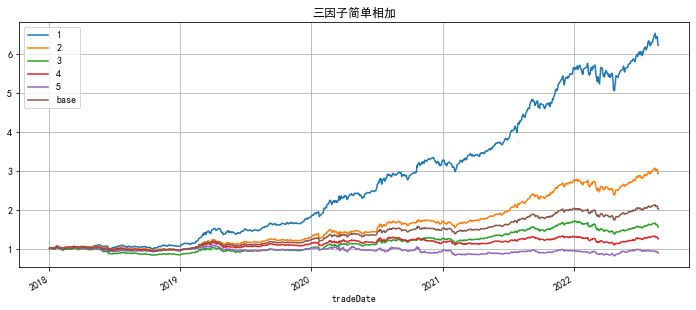

In [41]:
group_analysis(factor,day_return,title="三因子简单相加");

In [42]:
factor=0.3*priceRankdf+0.7*premRankdf+0.1*sizeRankdf
factor

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,29.0,33.7,15.9,15.4,17.6,26.0,16.5,14.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,30.1,34.2,17.0,15.2,21.1,25.6,18.0,17.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,30.1,34.2,15.6,15.5,22.8,25.3,20.1,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,29.0,34.5,15.6,16.1,22.1,26.0,17.2,18.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,29.0,33.9,15.6,15.7,23.5,25.6,19.4,17.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,177.9,NaN,NaN,NaN,NaN,...,333.9,246.9,346.0,145.9,210.2,166.8,312.6,256.5,248.3,147.8
2022-08-22,NaN,NaN,NaN,NaN,NaN,176.0,NaN,NaN,NaN,NaN,...,333.6,259.8,346.7,NaN,218.7,176.0,314.0,266.9,238.1,155.7
2022-08-23,NaN,NaN,NaN,NaN,NaN,179.5,NaN,NaN,NaN,NaN,...,329.1,277.8,346.7,NaN,221.0,165.1,311.1,277.6,223.2,153.3


,总收益,年化收益,夏普率,最大回撤,当年收益,当年最大回撤
1,6.04,0.52,2.34,0.15,0.11,0.15
2,1.78,0.25,1.46,0.17,-0.02,0.17
3,0.63,0.11,0.89,0.17,-0.02,0.16
4,0.38,0.07,0.71,0.14,-0.03,0.14
5,-0.28,-0.07,-0.46,0.37,-0.08,0.12
base,1.02,0.16,1.25,0.15,-0.01,0.15


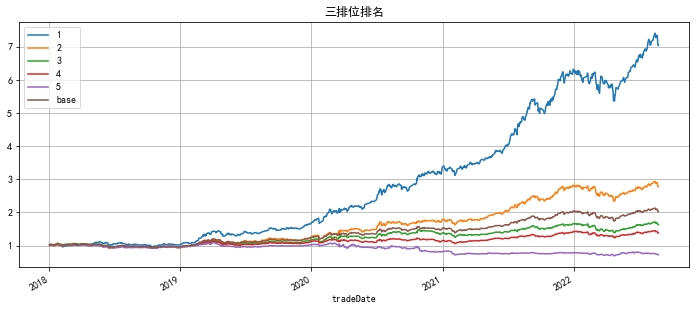

In [43]:
group_analysis(factor,day_return,title="三排位排名");

In [44]:
factor=0.3*price100df+0.7*prem100df+0.1*size100df
factor

tickerBond,110030,110031,110032,110033,110034,110038,110039,110040,110041,110042,...,128136,128137,128138,128139,128140,128141,128142,128143,128144,128145
tradeDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.251678,0.234956,0.689974,0.745205,0.714886,0.552293,0.750144,0.722711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.232498,0.223500,0.680468,0.638000,0.575182,0.506620,0.651659,0.614963,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,0.241282,0.229115,0.700000,0.685115,0.621447,0.566406,0.693566,0.679940,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,0.226299,0.232943,0.700000,0.709894,0.630659,0.532158,0.696420,0.675371,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,0.270170,0.240192,0.700000,0.690436,0.586669,0.547498,0.646428,0.659831,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,0.747161,NaN,NaN,NaN,NaN,...,0.280418,0.625968,0.271658,0.732226,0.592821,0.694314,0.295662,0.603466,0.618797,0.739623
2022-08-22,NaN,NaN,NaN,NaN,NaN,0.743631,NaN,NaN,NaN,NaN,...,0.286928,0.596851,0.268809,NaN,0.575886,0.656651,0.281814,0.571196,0.633006,0.726417
2022-08-23,NaN,NaN,NaN,NaN,NaN,0.737587,NaN,NaN,NaN,NaN,...,0.303067,0.565662,0.267638,NaN,0.577816,0.701731,0.291006,0.562296,0.660681,0.730813


,总收益,年化收益,夏普率,最大回撤,当年收益,当年最大回撤
1,-0.13,-0.03,-0.18,0.30,-0.05,0.11
2,0.02,0.00,0.09,0.18,-0.08,0.17
3,0.63,0.11,0.84,0.20,-0.07,0.20
4,2.25,0.29,1.64,0.16,0.05,0.16
5,5.96,0.52,2.57,0.14,0.11,0.11
base,1.02,0.16,1.25,0.15,-0.01,0.15


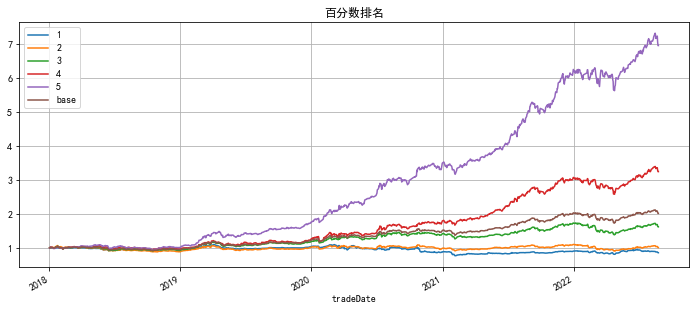

In [45]:
group_analysis(factor,day_return,title="百分数排名");